In [1]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Microsoft.csv", parse_dates=['Date'])
df.set_index('Date', drop=True, inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,40.599998,40.759998,40.310001,40.720001,35.969799,36865300
2015-04-02,40.660000,40.740002,40.119999,40.290001,35.589954,37487500
2015-04-06,40.340000,41.779999,40.180000,41.549999,36.702972,39223700
2015-04-07,41.610001,41.910000,41.310001,41.529999,36.685287,28809400
2015-04-08,41.459999,41.689999,41.040001,41.419998,36.588127,24753400


In [4]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,40.599998,40.759998,40.310001,40.720001,35.969799,36865300
2015-04-02,40.660000,40.740002,40.119999,40.290001,35.589954,37487500
2015-04-06,40.340000,41.779999,40.180000,41.549999,36.702972,39223700
2015-04-07,41.610001,41.910000,41.310001,41.529999,36.685287,28809400
2015-04-08,41.459999,41.689999,41.040001,41.419998,36.588127,24753400
2015-04-09,41.250000,41.619999,41.250000,41.480000,36.641129,25723900
2015-04-10,41.630001,41.950001,41.410000,41.720001,36.853138,28022000
2015-04-13,41.400002,42.060001,41.389999,41.759998,36.888462,30276700
2015-04-14,41.799999,42.029999,41.389999,41.650002,36.791309,24244400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,255.490005,261.500000,253.429993,260.649994,260.649994,33175400
2022-05-24,257.890015,261.329987,253.500000,259.619995,259.619995,29043900
2022-05-25,258.140015,264.579987,257.130005,262.519989,262.519989,28547900
2022-05-26,262.269989,267.109985,261.429993,265.899994,265.899994,25002100
2022-05-27,268.480011,273.339996,267.559998,273.239990,273.239990,26910800


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1.804000e+03
mean,137.144911,138.478049,135.720222,137.171142,133.341017,2.994949e+07
std,85.913857,86.806259,84.902792,85.895895,87.015180,1.372234e+07
min,40.340000,40.740002,39.720001,40.290001,35.589954,7.425600e+06
25%,63.165001,63.442500,62.745000,63.184999,58.490576,2.144610e+07
50%,107.530002,108.524998,106.114998,107.535000,103.118218,2.659730e+07
75%,207.617504,210.127499,204.767502,207.299996,204.141426,3.408572e+07
max,344.619995,349.670013,342.200012,343.109985,341.606384,1.352271e+08


In [7]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

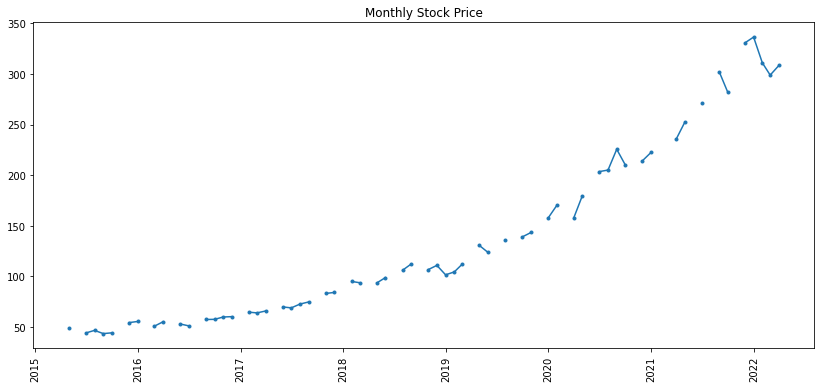

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df.asfreq('M').Close, marker='.')
plt.title('Monthly Stock Price')
plt.xticks(rotation=90)
plt.show()

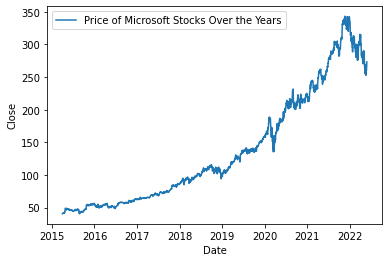

In [9]:
sns.lineplot(data= df.Close, label = "Price of Microsoft Stocks Over the Years")


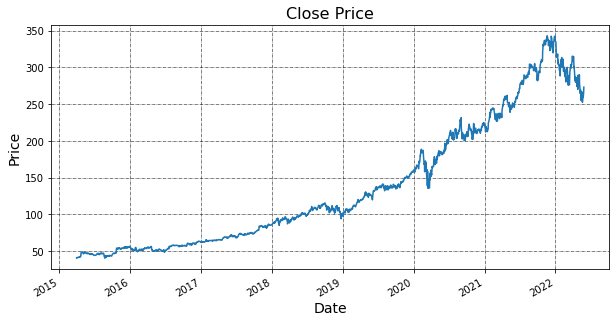

In [10]:
df.Close.plot(figsize=(10, 5))
plt.title("Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

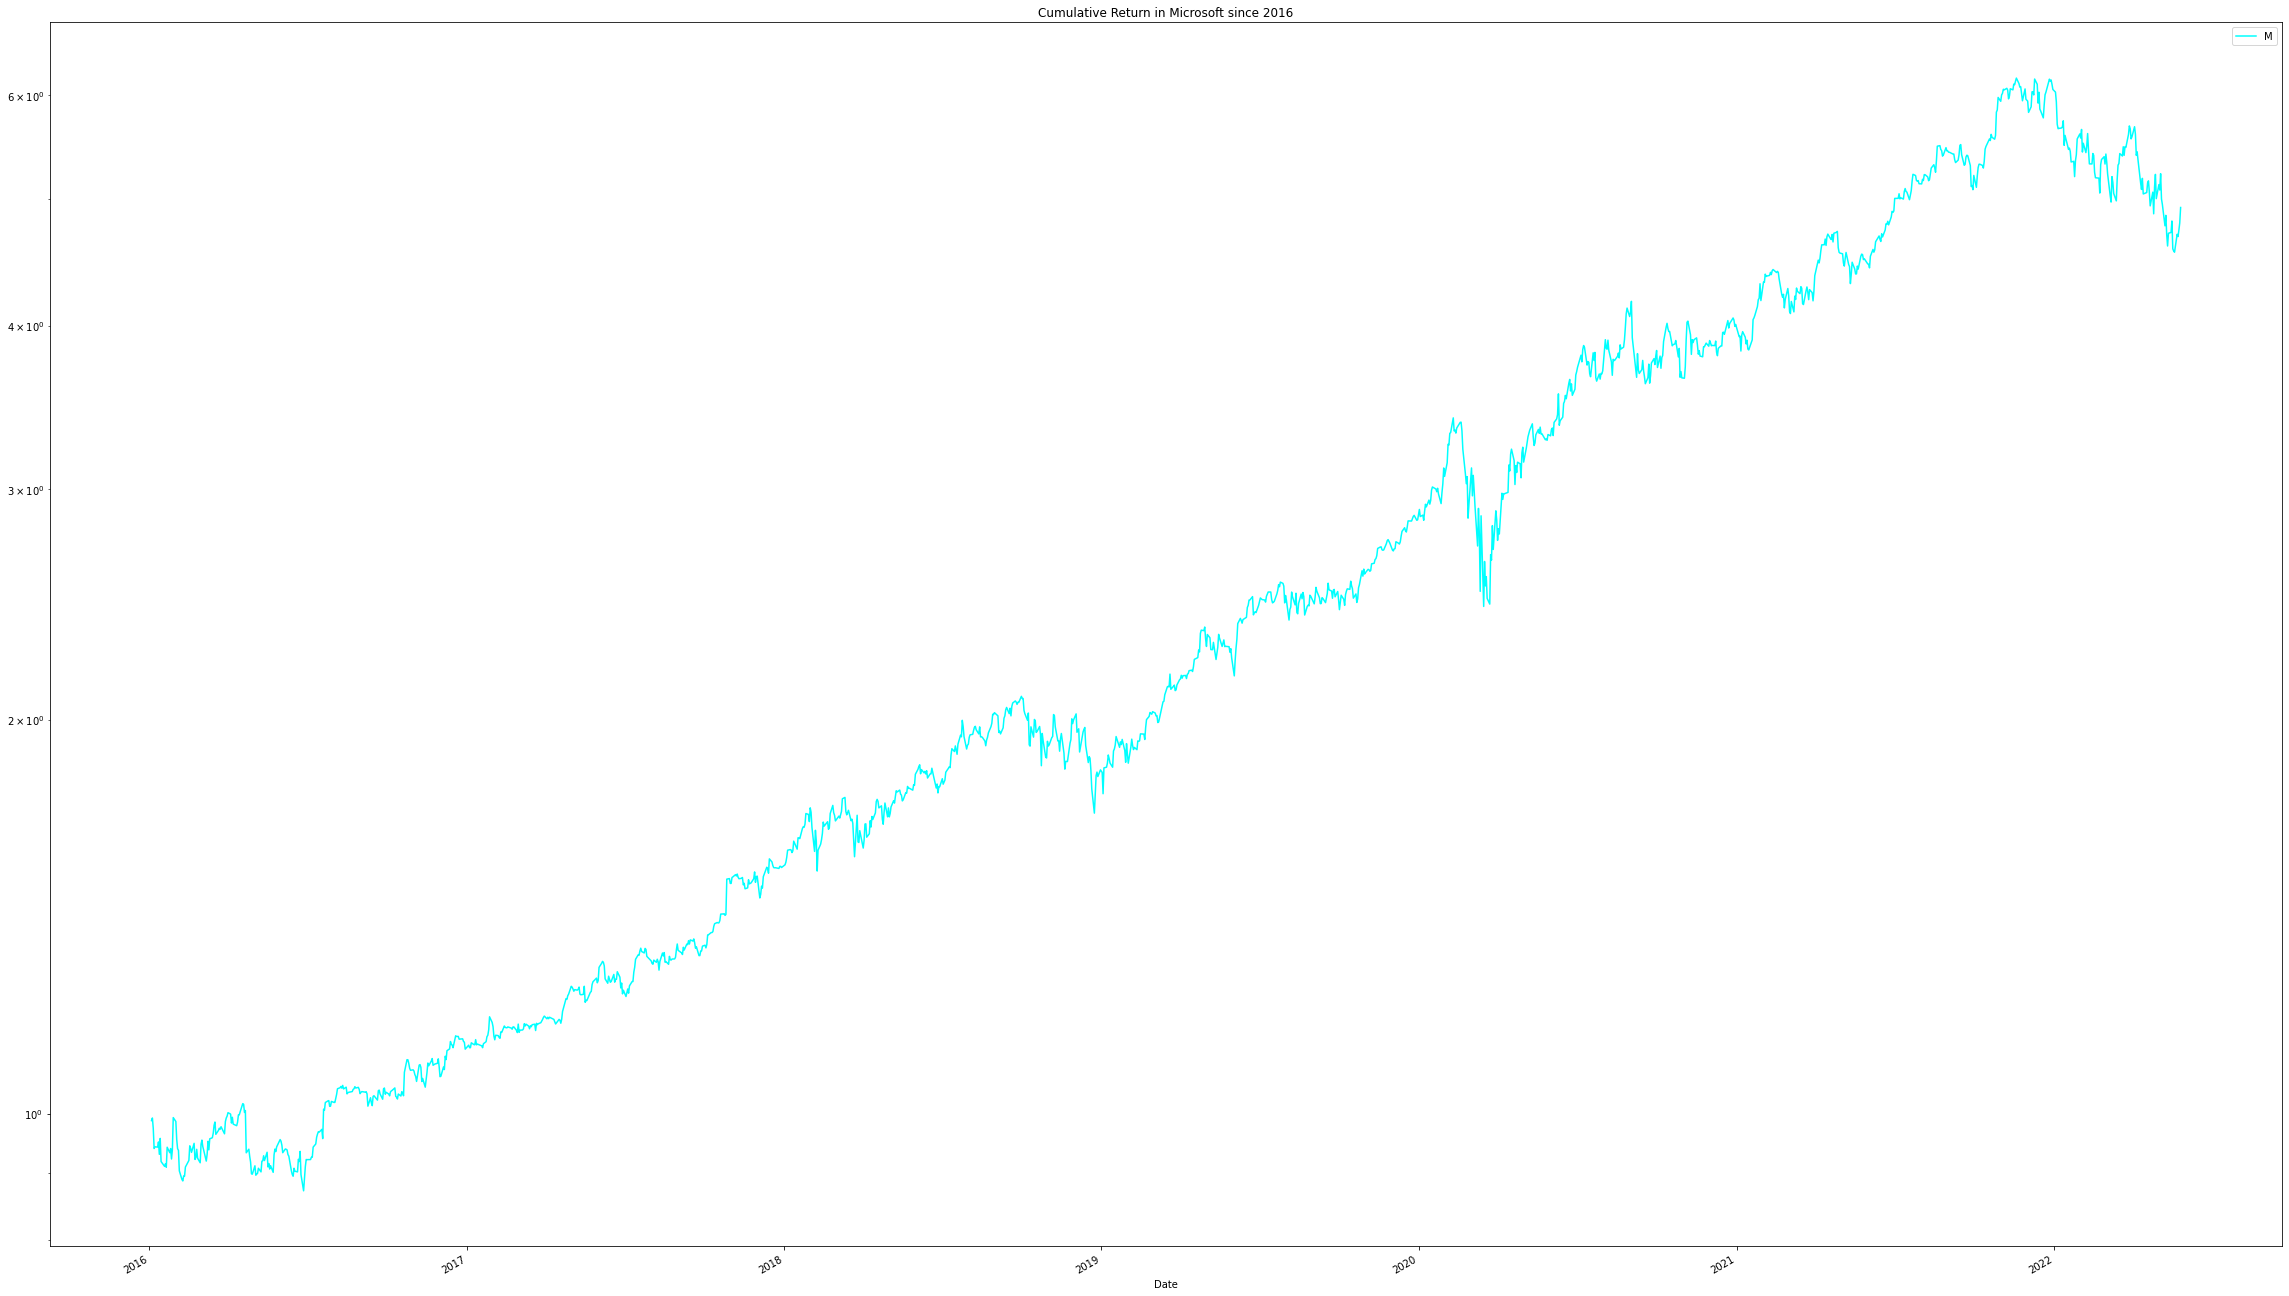

In [11]:
df_return = df['2015-12-31':].Close.pct_change()+1
df_cum = df_return.cumprod()
plt.figure(figsize=(40,25))
df_cum.plot(c='cyan')
plt.title('Cumulative Return in Microsoft since 2016')
plt.legend(('Microsoft'))
plt.yscale('log')
plt.show()

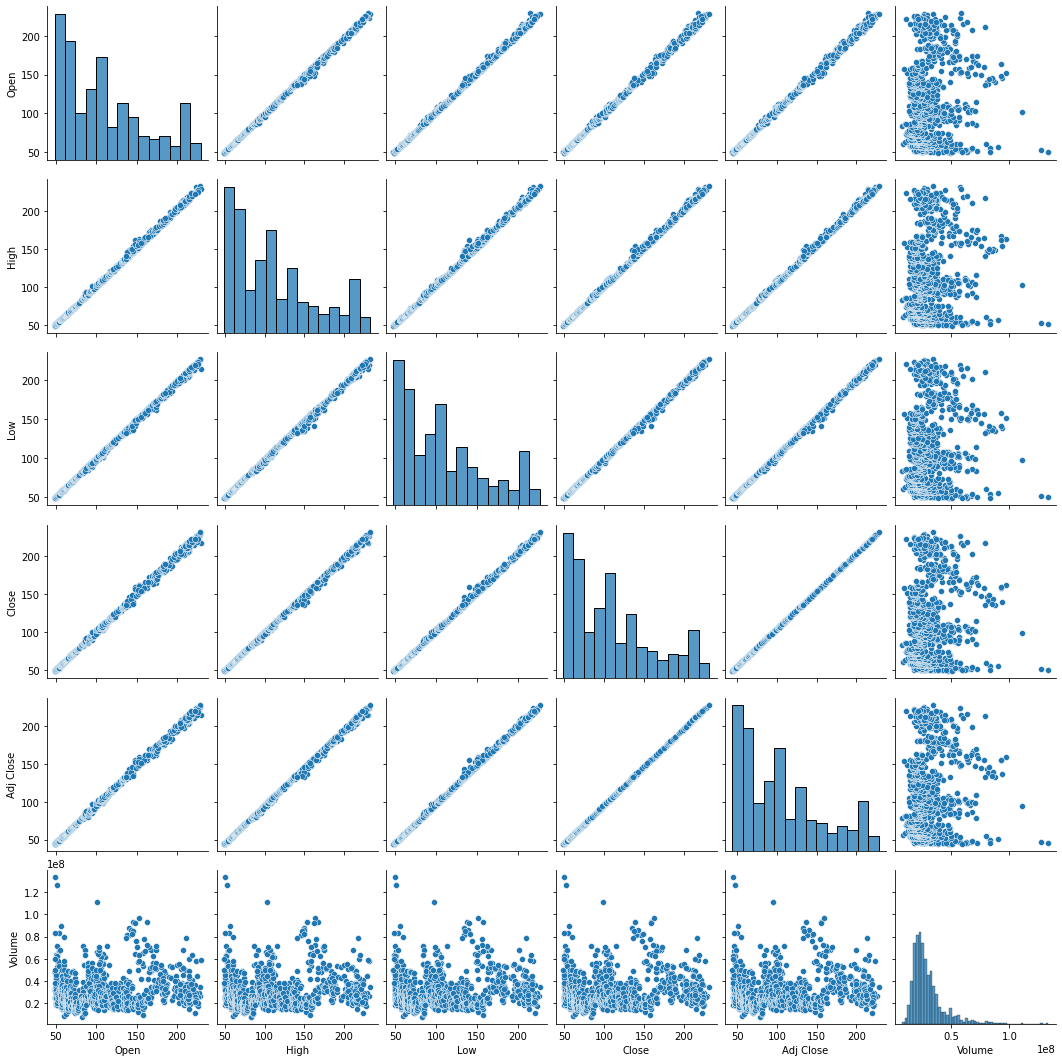

In [12]:
sns.pairplot(df.loc['2016-01-01':'2021-01-01'])

LSTM MODEL


In [13]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 1.9 Kill warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
data= pd.read_csv("/content/drive/MyDrive/Microsoft.csv", parse_dates=['Date'])
data.set_index('Date', drop=True, inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,40.599998,40.759998,40.310001,40.720001,35.969799,36865300
2015-04-02,40.660000,40.740002,40.119999,40.290001,35.589954,37487500
2015-04-06,40.340000,41.779999,40.180000,41.549999,36.702972,39223700
2015-04-07,41.610001,41.910000,41.310001,41.529999,36.685287,28809400
2015-04-08,41.459999,41.689999,41.040001,41.419998,36.588127,24753400


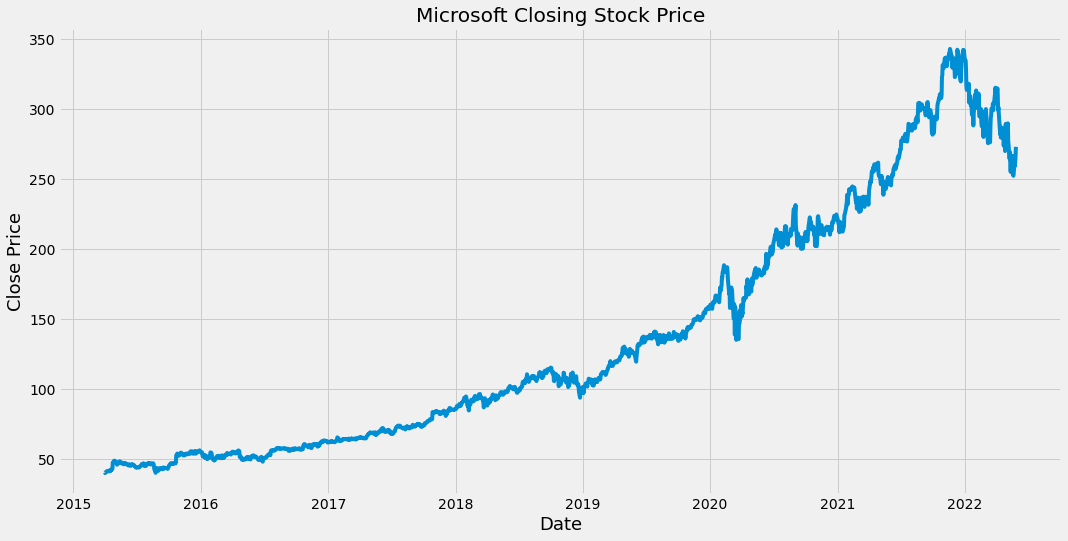

In [15]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Microsoft Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

In [16]:
data.shape

(1804, 6)

In [17]:
msft= data.filter(["Close"])

In [18]:
dataset=msft.values

In [19]:
train_data_len=math.ceil(len(dataset) *.8)
train_data_len

1444

In [20]:
scaler = MinMaxScaler(feature_range= (0,1))
scale_data=scaler.fit_transform(dataset)

In [21]:
train_data = scale_data[0:train_data_len,:]

In [22]:
x_train = []
y_train = []
for i in range (80,len(train_data)):
  x_train.append(train_data[i-80:i,0])
  y_train.append (train_data[i,0])
  if i<=81:
    print(x_train)
    print(y_train)
    print()

[array([0.00141999, 0.        , 0.00416088, 0.00409484, 0.00373158,
       0.00392972, 0.00472228, 0.00485436, 0.00449112, 0.00650551,
       0.00617528, 0.00439204, 0.008652  , 0.00776038, 0.00891619,
       0.01007199, 0.02503137, 0.02555973, 0.02929133, 0.0289611 ,
       0.02757413, 0.02764018, 0.02625322, 0.02413974, 0.01978072,
       0.02116769, 0.02463509, 0.02338022, 0.02331417, 0.02423882,
       0.02783832, 0.02645135, 0.02549368, 0.02407371, 0.02407371,
       0.02354533, 0.02182815, 0.02080444, 0.02417278, 0.02364441,
       0.02169606, 0.0229179 , 0.02189419, 0.02166303, 0.02004491,
       0.0193184 , 0.01796446, 0.01770029, 0.02087049, 0.02030909,
       0.01875702, 0.01713889, 0.0182947 , 0.01875702, 0.02123374,
       0.01918631, 0.01961561, 0.01855888, 0.01766726, 0.01770029,
       0.01641238, 0.01347334, 0.01274685, 0.01373753, 0.01357242,
       0.01353939, 0.01324218, 0.01304406, 0.01396869, 0.0142659 ,
       0.01733703, 0.01760121, 0.01806353, 0.0210356 , 0.0209

In [23]:
x_train, y_train= np.array(x_train), np.array(y_train)


In [24]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1 ))
x_train.shape

(1364, 80, 1)

In [25]:
model =Sequential()
model.add(LSTM(70, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(70, return_sequences=False))
model.add(Dense(35))
model.add(Dense(1))

In [26]:
model.compile(optimizer= 'rmsprop', loss='mean_squared_error')

In [27]:
model.fit(x_train, y_train, batch_size=1, epochs =20 )

Epoch 1/20
1364/1364 [==============================] - 52s 36ms/step - loss: 0.0012
Epoch 2/20
1364/1364 [==============================] - 55s 40ms/step - loss: 5.1529e-04
Epoch 3/20
1364/1364 [==============================] - 46s 33ms/step - loss: 3.5819e-04
Epoch 4/20
1364/1364 [==============================] - 49s 36ms/step - loss: 2.9381e-04
Epoch 5/20
1364/1364 [==============================] - 46s 34ms/step - loss: 2.8390e-04
Epoch 6/20
1364/1364 [==============================] - 46s 34ms/step - loss: 2.5115e-04
Epoch 7/20
1364/1364 [==============================] - 48s 36ms/step - loss: 2.2727e-04
Epoch 8/20
1364/1364 [==============================] - 54s 40ms/step - loss: 2.1444e-04
Epoch 9/20
1364/1364 [==============================] - 46s 34ms/step - loss: 1.9319e-04
Epoch 10/20
1364/1364 [==============================] - 48s 35ms/step - loss: 2.0369e-04
Epoch 11/20
1364/1364 [==============================] - 48s 35ms/step - loss: 1.9352e-04
Epoch 12/20
1364/1364 [

In [28]:
test_data = scale_data[train_data_len-80: , :]
x_test = []
y_test = dataset[train_data_len:, :]
for i in range (80, len(test_data)):
  x_test.append(test_data[i-80:i,0])

In [29]:
x_test= np.array(x_test)


In [30]:
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
predictions = model.predict (x_test)
predictions = scaler.inverse_transform(predictions)

In [32]:
rmse = np.sqrt(np.mean(predictions -y_test)**2)
rmse

8.331449209643555

In [33]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions 

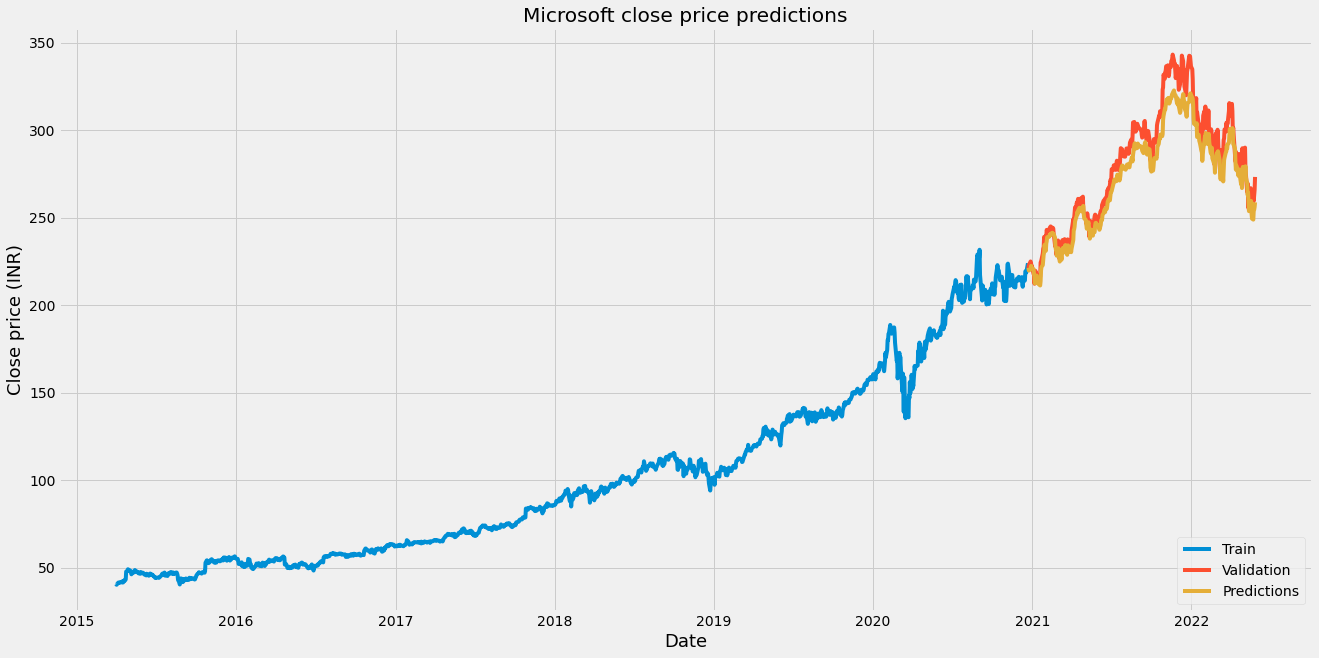

In [34]:
plt.figure(figsize=(20,10))
plt.title('Microsoft close price predictions')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price (INR)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()


ARIMA MODEL

In [35]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [36]:
msft= pd.read_csv("/content/drive/MyDrive/Microsoft.csv", parse_dates=['Date'])

msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-01,40.599998,40.759998,40.310001,40.720001,35.969799,36865300
1,2015-04-02,40.660000,40.740002,40.119999,40.290001,35.589954,37487500
2,2015-04-06,40.340000,41.779999,40.180000,41.549999,36.702972,39223700
3,2015-04-07,41.610001,41.910000,41.310001,41.529999,36.685287,28809400
4,2015-04-08,41.459999,41.689999,41.040001,41.419998,36.588127,24753400


In [37]:
msft.drop(['Volume', 'Adj Close'],inplace=True,axis=1)

In [38]:
msft.head()

,Date,Open,High,Low,Close
0,2015-04-01,40.599998,40.759998,40.310001,40.720001
1,2015-04-02,40.660000,40.740002,40.119999,40.290001
2,2015-04-06,40.340000,41.779999,40.180000,41.549999
3,2015-04-07,41.610001,41.910000,41.310001,41.529999
4,2015-04-08,41.459999,41.689999,41.040001,41.419998


In [39]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1804 non-null   datetime64[ns]
 1   Open    1804 non-null   float64       
 2   High    1804 non-null   float64       
 3   Low     1804 non-null   float64       
 4   Close   1804 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 70.6 KB


In [40]:
msft_month = msft.resample('M', on='Date').mean()

## Stationarity check and Seasonal decomposition
If a time series is stationary, it implies the lack of broad trends (changes in mean and variance over time) in the data. This is important as a consideration in time series forecasting.

Dickey–Fuller test: p=0.969107


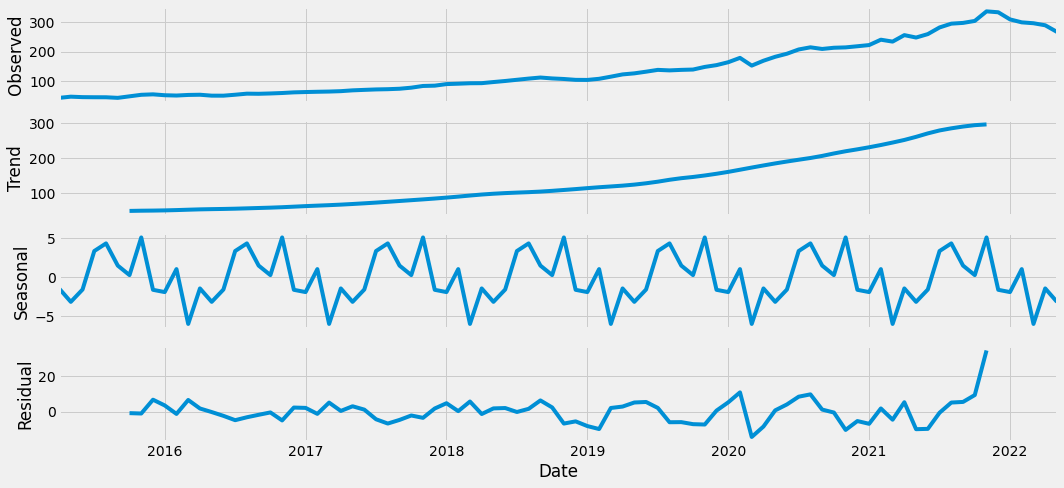

In [41]:
#seasonal_decompose(msft_month.close, freq=12).plot()
seasonal_decompose(msft_month.Close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(msft_month.Close)[1])
plt.show()
#The p-value indicates that series is not stationary with 96.91% confidence.

Box-Cox Transformation Lets use the Box-Cox transformation to suppress some of the variance.

The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it the parameter needs to be estimated from the data. In time series the process could have a non-constant variance. if the variance changes with time the process is nonstationary. It is often desirable to transform a time series to make it stationary. Sometimes after applying Box-Cox with a particular value of lambda the process may look stationary. It is sometimes possible that even if after applying the Box-Cox transformation the series does not appear to be stationary, diagnostics from ARIMA modeling can then be used to decide if differencing or seasonal differencing might be useful to to remove polynomial trends or seasonal trends respectively. After that the result might be an ARMA model that is stationary. If diagnostics confirm the orders p an q for the ARMA model, the AR and MA parameters can then be estimated.

In [42]:
# Box-Cox Transformations
msft_month['Close_box'], lmbda = stats.boxcox(msft_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(msft_month.Close_box)[1])
#The p-value indicates that series is still not stationary.

Dickey–Fuller test: p=0.771794


Differencing When building models to forecast time series data (like ARIMA), another pre-processing step is differencing the data (calculating sequentially xt−xt−1) until we get to a point where the series is stationary. Models account for oscillations but not for trends, and therefore, accounting for trends by differencing allows us to use the models that account for oscillations.

Once the model has been constructed, we can account for trends separately, by adding the trends component-wise.

Seasonal differentiation One method of differencing data is seasonal differencing, which involves computing the difference between an observation and the corresponding observation in the previous year.

In [43]:
# Seasonal differentiation (12 months)
msft_month['box_diff_seasonal_12'] = msft_month.Close_box - msft_month.Close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(msft_month.box_diff_seasonal_12[12:])[1])
#The p-value indicates that series is still not stationary.


Dickey–Fuller test: p=0.002374


In [44]:
# Seasonal differentiation (9 months)
msft_month['box_diff_seasonal_9'] = msft_month.Close_box - msft_month.Close_box.shift(9)
print("Dickey–Fuller test: p=%f" % adfuller(msft_month.box_diff_seasonal_9[9:])[1])
#The p-value indicates that series is still not stationary.

Dickey–Fuller test: p=0.243769


In [45]:
# Seasonal differentiation (3 months)
msft_month['box_diff_seasonal_3'] = msft_month.Close_box - msft_month.Close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(msft_month.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.055278


Dickey–Fuller test: p=0.000000


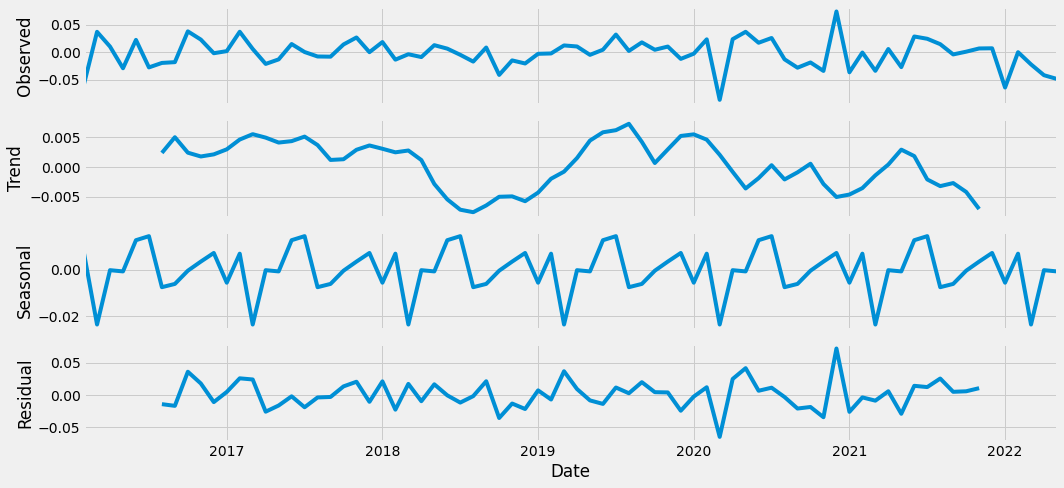

In [46]:
# Regular differentiation
msft_month['box_diff2'] = msft_month.box_diff_seasonal_9 - msft_month.box_diff_seasonal_9.shift(1)

# STL-decomposition
seasonal_decompose(msft_month.box_diff2[10:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(msft_month.box_diff2[10:])[1])

plt.show()

The p-value indicates that series is stationary as the computed p-value is lower than the significance level alpha = 0.05.

# Autocorrelation
Autocorrelation is the correlation of a time series with the same time series lagged. It summarizes the strength of a relationship with an observation in a time series with observations at prior time steps.

We create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify patterns in the above data which is stationary on both mean and variance. The idea is to identify presence of AR and MA components in the residuals.

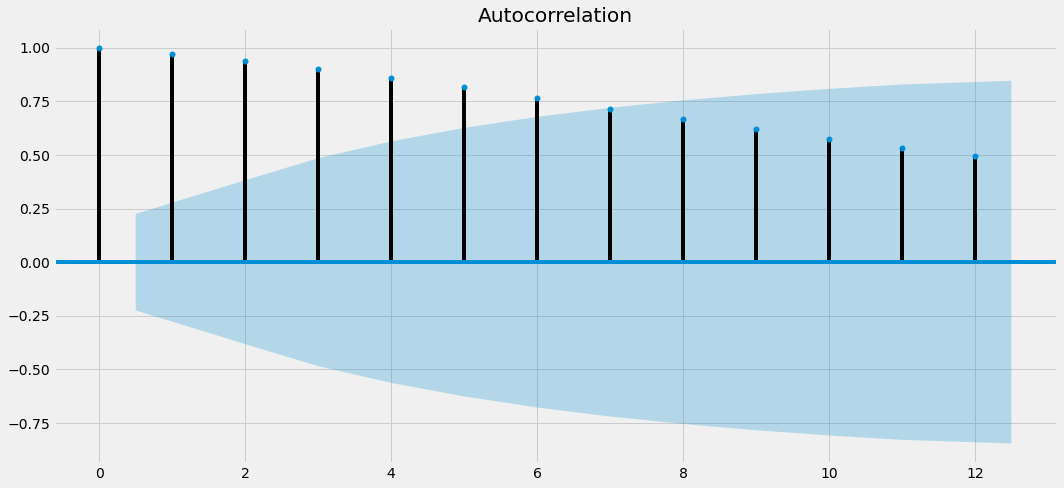

In [47]:
#autocorrelation_plot(btc_month.close)
plot_acf(msft_month.Close[10:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

There is a positive correlation with the first 11 lags that is perhaps significant for the first 2-3 lags.

A good starting point for the AR parameter of the model may be 3.

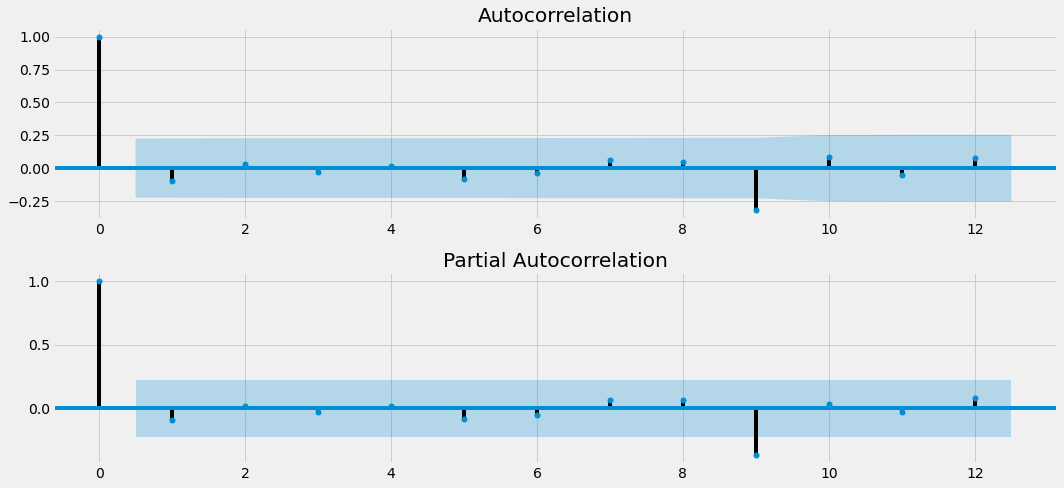

In [48]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(msft_month.box_diff2[10:].values.squeeze(), lags=48, ax=ax)
plot_acf(msft_month.box_diff2[10:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(msft_month.box_diff2[10:].values.squeeze(), lags=48, ax=ax)
plot_pacf(msft_month.box_diff2[10:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

There are not many spikes in the plots outside the insignificant zone (shaded) so there may not be enough information available in the residuals to be extracted by AR and MA models.

There may be a seasonal component available in the residuals at the lags of quarters (3 months) represented by spikes at these intervals. But probably not significant.

# ARIMA Model
AutoRegressive Integrated Moving Average

ARIMA models are denoted with the notation ARIMA(p, d, q). These parameters account for seasonality, trend, and noise in datasets:

p - the number of lag observations to include in the model, or lag order. (AR) d - the number of times that the raw observations are differenced, or the degree of differencing. (I) q - the size of the moving average window, also called the order of moving average.(MA)

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model. A value of 0 for a parameter indicates to not use that element of the model. Parameter Selection We will iteratively explore different combinations of parameters. For each combination we fit a new ARIMA model with SARIMAX() and assess its overall quality.

We will use the AIC (Akaike Information Criterion) value, returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [49]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(msft_month.Close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


In [50]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
4     (1, 1) -411.480376
7     (2, 1) -409.199827
8     (2, 2) -407.386333
3     (1, 0) -404.269360
1     (0, 1) -403.853941


In [51]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:              Close_box   No. Observations:                   86
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 208.740
Date:                Tue, 09 Aug 2022   AIC                           -411.480
Time:                        15:45:56   BIC                           -404.152
Sample:                    04-30-2015   HQIC                          -408.533
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9977      0.017     57.079      0.000       0.963       1.032
ma.L1         -0.9717      0.108     -9.030      0.000      -1.183      -0.761
sigma2         0.0004   5.66e-05      7.501      0.0

Analysis of Results The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

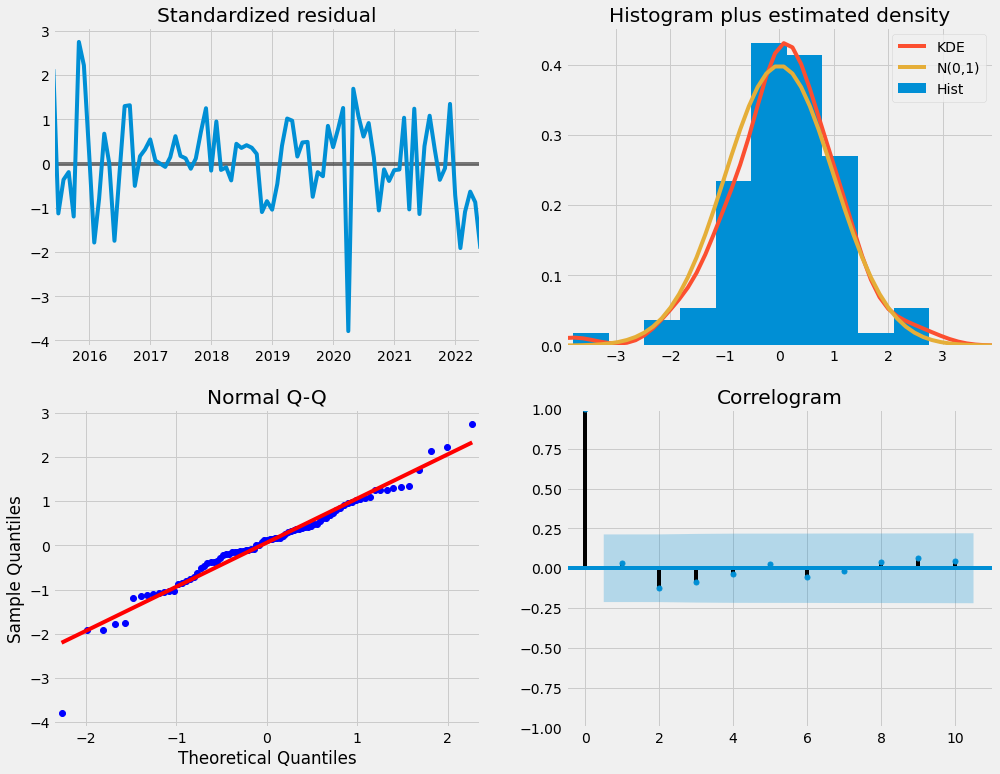

In [52]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In the histogram (top right), the KDE line should follow the N(0,1) line (normal distribution with mean 0, standard deviation 1) closely. This is an indication whether the residuals are normally distributed or not.

In the Q-Q-plot the ordered distribution of residuals (blue dots) should follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is an indication whether the residuals are normally distributed.

The standardized residual plot doesn't display any obvious seasonality. This is confirmed by the autocorrelation plot, which shows that the time series residuals have low correlation with lagged versions of itself.

# Prediction

In [53]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

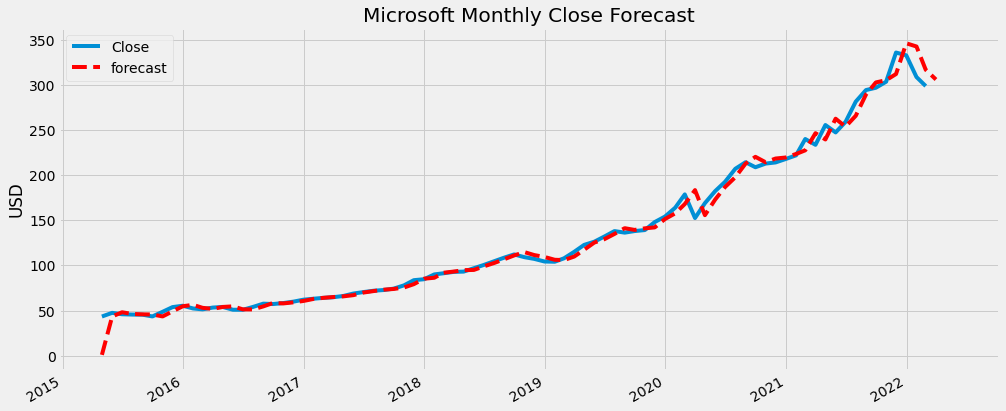

In [54]:
# Prediction
msft_month2 = msft_month[['Close']]
date_list = [datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2022, 4, 29), datetime(2022, 5, 27)]
future = pd.DataFrame(index=date_list, columns= msft_month.columns)
msft_month2 = pd.concat([msft_month2, future])

msft_month2['forecast'] = invboxcox(best_model.predict(start=0, end=85), lmbda)

plt.figure(figsize=(15,7))
msft_month2.Close.plot()
msft_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Microsoft Monthly Close Forecast')
plt.ylabel('USD')
plt.savefig('Microsoft_monthly_forecast.png')
plt.show()

In [55]:
y_forecasted = msft_month2.forecast
y_truth = msft_month2['2015-04-01':'2022-05-27'].Close
# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 9.57


# MODELS

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader as web
import warnings


In [57]:
#from google.colab import files
#uploaded = files.upload()
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("/content/drive/MyDrive/Microsoft.csv", parse_dates=['Date'])
data.set_index('Date', drop=True, inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,40.599998,40.759998,40.310001,40.720001,35.969799,36865300
2015-04-02,40.660000,40.740002,40.119999,40.290001,35.589954,37487500
2015-04-06,40.340000,41.779999,40.180000,41.549999,36.702972,39223700
2015-04-07,41.610001,41.910000,41.310001,41.529999,36.685287,28809400
2015-04-08,41.459999,41.689999,41.040001,41.419998,36.588127,24753400


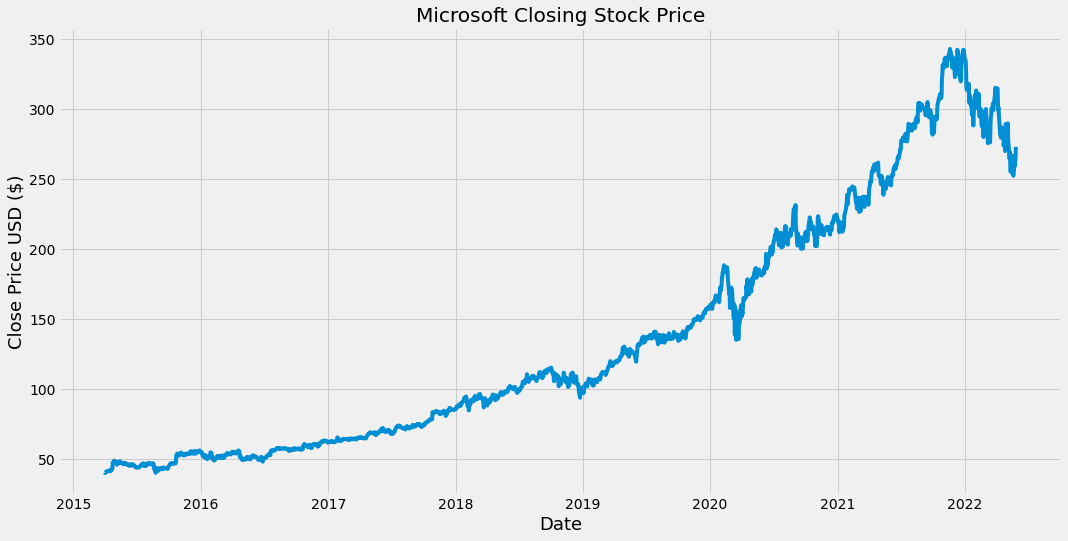

In [58]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Microsoft Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [59]:
msft = data[["Close"]]

print(msft.head())

                Close
Date                 
2015-04-01  40.720001
2015-04-02  40.290001
2015-04-06  41.549999
2015-04-07  41.529999
2015-04-08  41.419998


In [60]:
futureDays = 120

In [61]:
msft["Prediction"] = msft[["Close"]].shift(-futureDays)

print(msft.head(20))
print(msft.tail(40))

msft.describe(include='all')

                Close  Prediction
Date                             
2015-04-01  40.720001   43.900002
2015-04-02  40.290001   43.869999
2015-04-06  41.549999   43.910000
2015-04-07  41.529999   43.939999
2015-04-08  41.419998   43.290001
2015-04-09  41.480000   43.439999
2015-04-10  41.720001   44.259998
2015-04-13  41.759998   44.610001
2015-04-14  41.650002   45.570000
2015-04-15  42.259998   46.630001
2015-04-16  42.160000   46.750000
2015-04-17  41.619999   46.799999
2015-04-20  42.910000   47.450001
2015-04-21  42.639999   47.110001
2015-04-22  42.990002   47.000000
2015-04-23  43.340000   46.889999
2015-04-24  47.869999   46.680000
2015-04-27  48.029999   47.009998
2015-04-28  49.160000   47.509998
2015-04-29  49.060001   47.619999
                 Close  Prediction
Date                              
2022-04-01  309.420013         NaN
2022-04-04  314.970001         NaN
2022-04-05  310.880005         NaN
2022-04-06  299.500000         NaN
2022-04-07  301.369995         NaN
2022-04

,Close,Prediction
count,1804.000000,1684.000000
mean,137.171142,143.714281
std,85.895895,85.204729
min,40.290001,43.290001
25%,63.184999,69.070002
50%,107.535000,111.729999
75%,207.299996,211.912502
max,343.109985,343.109985


In [62]:
import numpy as np
x = np.array(msft.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 40.720001]
 [ 40.290001]
 [ 41.549999]
 ...
 [329.48999 ]
 [323.01001 ]
 [326.190002]]


In [63]:
y = np.array(msft["Prediction"])[:-futureDays]
print(y)

[ 43.900002  43.869999  43.91     ... 262.519989 265.899994 273.23999 ]


In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


print(xtrain)

[[224.960007]
 [182.830002]
 [ 68.459999]
 ...
 [137.119995]
 [ 55.209999]
 [ 42.610001]]


In [65]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

#using the support vector model

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
svmReg = regressor.fit(xtrain,ytrain)

In [66]:
xfuture = msft.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[260.899994]
 [259.429993]
 [262.630005]
 [265.51001 ]
 [265.269989]
 [266.690002]
 [265.019989]
 [268.720001]
 [271.399994]
 [270.899994]
 [271.600006]
 [277.649994]
 [277.660004]
 [279.929993]
 [277.420013]
 [277.940002]
 [277.320007]
 [280.980011]
 [282.51001 ]
 [281.029999]
 [280.75    ]
 [277.01001 ]
 [279.320007]
 [281.399994]
 [286.140015]
 [289.670013]
 [289.049988]
 [286.540009]
 [286.220001]
 [286.5     ]
 [284.910004]
 [284.820007]
 [287.119995]
 [286.51001 ]
 [289.519989]
 [289.459991]
 [288.329987]
 [286.440002]
 [286.950012]
 [289.809998]
 [292.850006]
 [294.600006]
 [293.079987]
 [290.730011]
 [296.769989]
 [304.359985]
 [304.649994]
 [302.619995]
 [302.01001 ]
 [299.089996]
 [299.720001]
 [303.589996]
 [301.880005]
 [301.829987]
 [301.149994]
 [301.140015]
 [300.179993]
 [300.209991]
 [297.25    ]
 [295.709991]
 [296.98999 ]
 [299.790009]
 [304.820007]
 [305.220001]
 [299.869995]
 [294.299988]
 [294.799988]
 [298.579987]
 [299.559998]
 [299.350006]
 [294.170013]
 [283.

In [67]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)


Decision Tree prediction = [334.920013  334.970001  304.209991  342.540009  339.399994  342.540009
 334.649994  324.899994  323.799988  323.799988  327.290009  333.200012
 333.200012  342.450012  333.200012  341.950012  313.880005  336.320007
 299.48999   336.320007  316.380005  313.880005  342.450012  336.320007
 314.980011  318.269989  304.799988  310.200012  302.649994  288.48999
 301.600006  301.600006  296.369995  288.48999   296.709991  299.839996
 308.26001   310.980011  308.76001   313.459991  301.25      305.940002
 300.950012  304.559998  311.209991  302.380005  295.040009  295.
 300.470001  287.149994  290.730011  287.929993  287.720001  280.269989
 297.309998  297.309998  294.950012  294.950012  300.190002  310.880005
 289.859985  278.910004  295.040009  295.040009  285.589996  280.070007
 276.440002  287.149994  290.730011  290.730011  309.420013  299.160004
 304.059998  299.48999   304.100006  299.160004  310.700012  315.410004
 311.0849915 311.0849915 309.420013  314.970

In [68]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)
r2_score = linear.score(xfuture,linearPrediction)
print(r2_score*100,'%')

Linear regression Prediction = [289.51702952 287.93208123 291.38231939 294.48752749 294.22873795
 295.75978941 293.95918911 297.94852496 300.83808104 300.29898334
 301.05373305 307.57680218 307.58759491 310.03508657 307.32883772
 307.88948746 307.22101172 311.16721113 312.81684898 311.22110796
 310.91921433 306.88677438 309.37740248 311.62003486 316.73070361
 320.53673116 319.86822307 317.1619753  316.81694415 317.11883778
 315.40451143 315.30747708 317.78731352 317.12963051 320.37497597
 320.31028641 319.09192131 317.05414821 317.60403864 320.68766234
 323.96538493 325.85222684 324.21334938 321.67961611 328.19189249
 336.37539113 336.6880775  334.49934195 333.84165894 330.69331333
 331.37258181 335.54519255 333.70148815 333.64755897 332.91439366
 332.90363435 331.86854306 331.90088677 328.70943814 327.04900755
 328.42909656 331.44806411 336.87138473 337.30265641 331.53430465
 325.52874882 326.06784651 330.14342398 331.20006732 330.97365491
 325.38861038 313.90580368 314.42334932 312.1

In [69]:
svmPrediction = svmReg.predict(xfuture)
print("SVM regression Prediction =",svmPrediction)

SVM regression Prediction = [290.12560356 289.49908302 290.78991312 291.71768463 291.648954
 292.03267692 291.57569667 292.48501579 292.9074609  292.84378992
 292.93098248 293.11629669 293.11576145 292.92313276 293.12783141
 293.099669   293.1323912  292.78628408 292.53330081 292.77902051
 292.81883067 293.14476799 292.98880198 292.72314858 291.68259964
 290.5260894  290.7521859  291.56763903 291.65994421 291.57932506
 292.00991291 292.03230065 291.39357577 291.57640518 290.58168193
 290.60375672 291.00256657 291.59677166 291.44549181 290.4737089
 289.21701355 288.39271289 289.11282234 290.11731362 287.27199634
 282.55462895 282.35156018 283.73939608 284.14078747 285.95755288
 285.58056383 283.08608911 284.2253795  284.25783532 284.69407314
 284.70040527 285.30002953 285.28158121 287.009726   287.83285728
 287.15242755 285.53815422 282.23178493 281.9478765  285.48957413
 288.53914351 288.29394451 286.25654434 285.67710354 285.80298445
 288.60192862 292.33176048 292.22641674 292.6383517

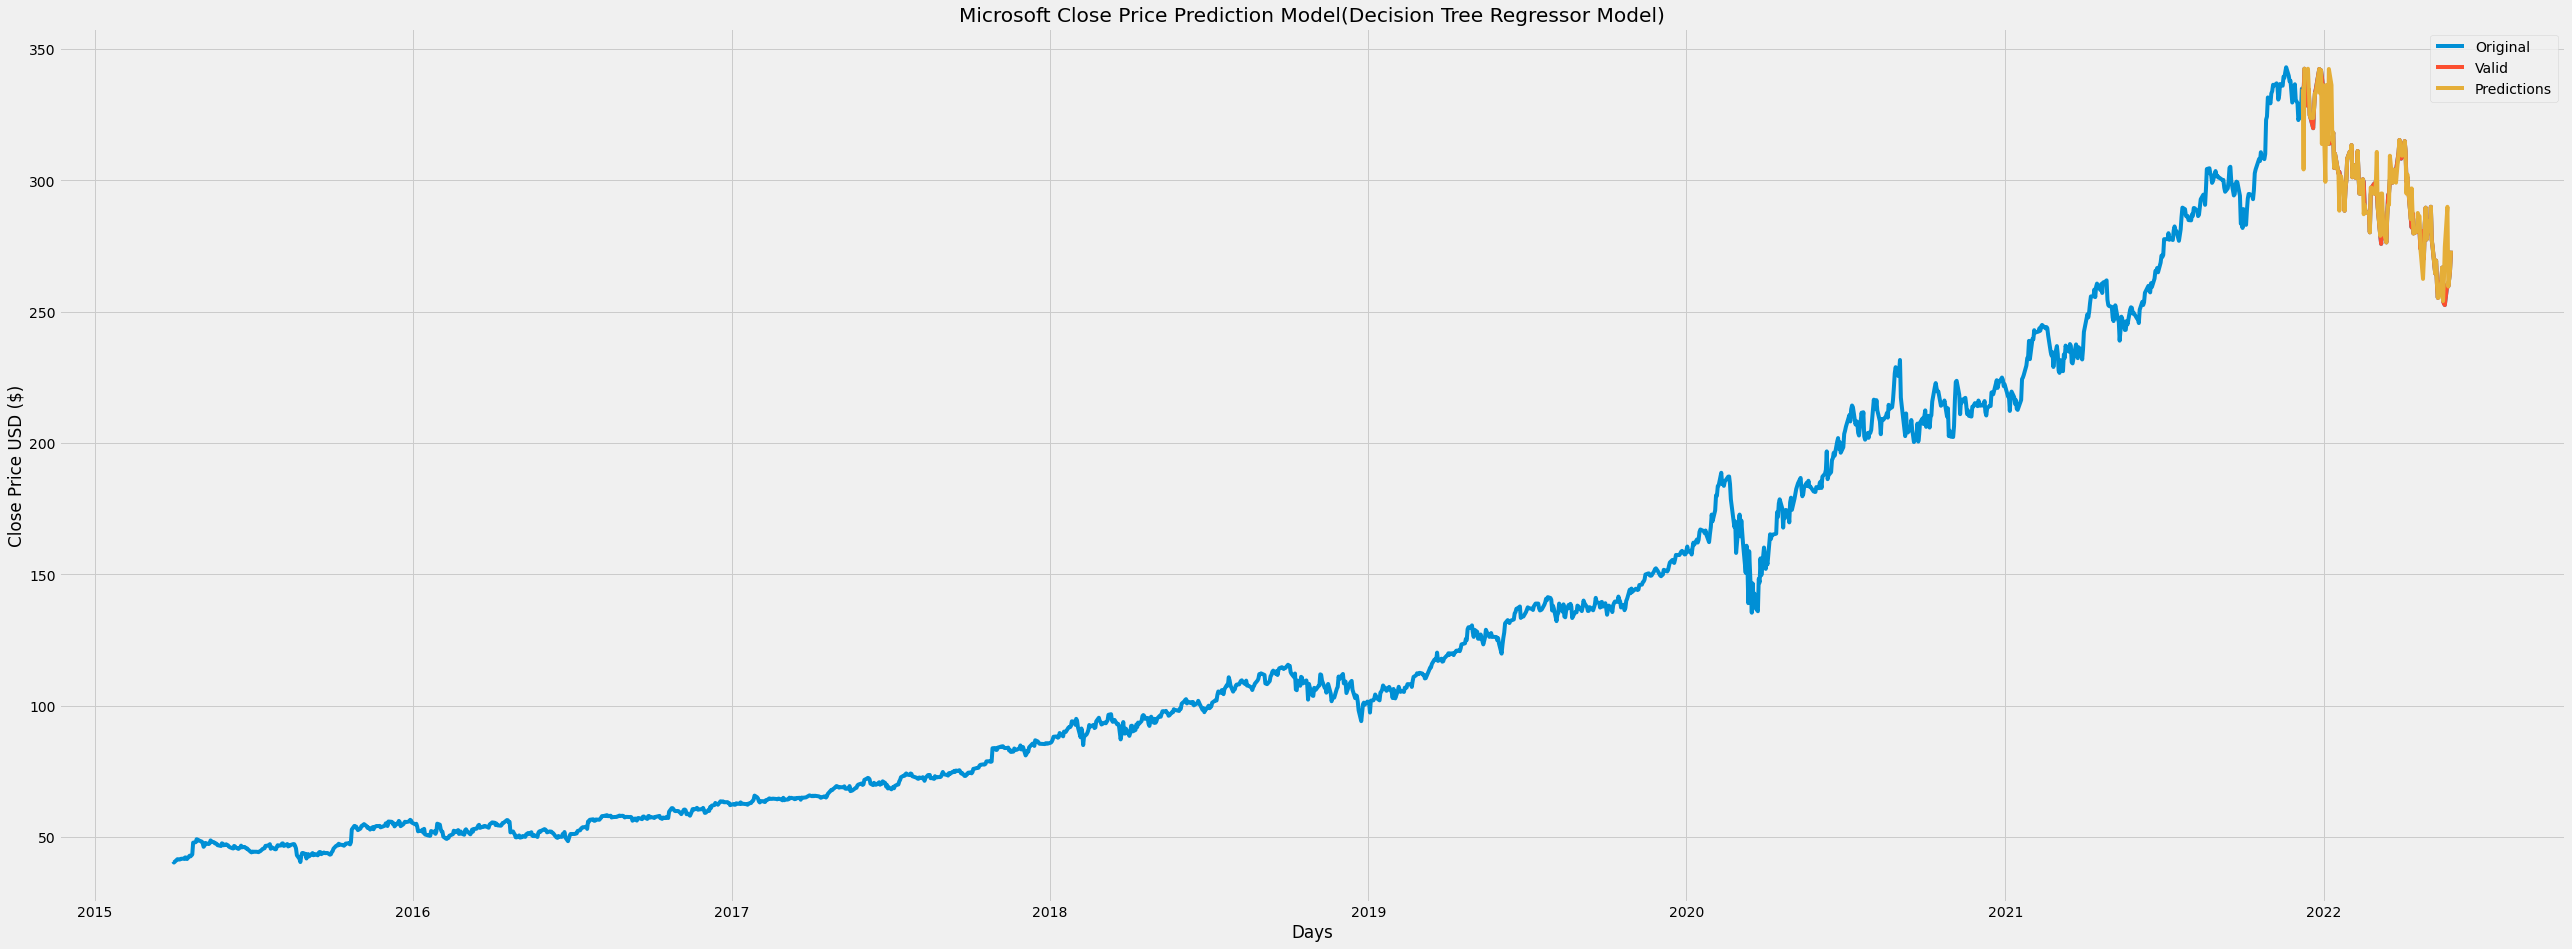

In [70]:
predictions = treePrediction
valid = msft[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40,15))
plt.title("Microsoft Close Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(msft["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()


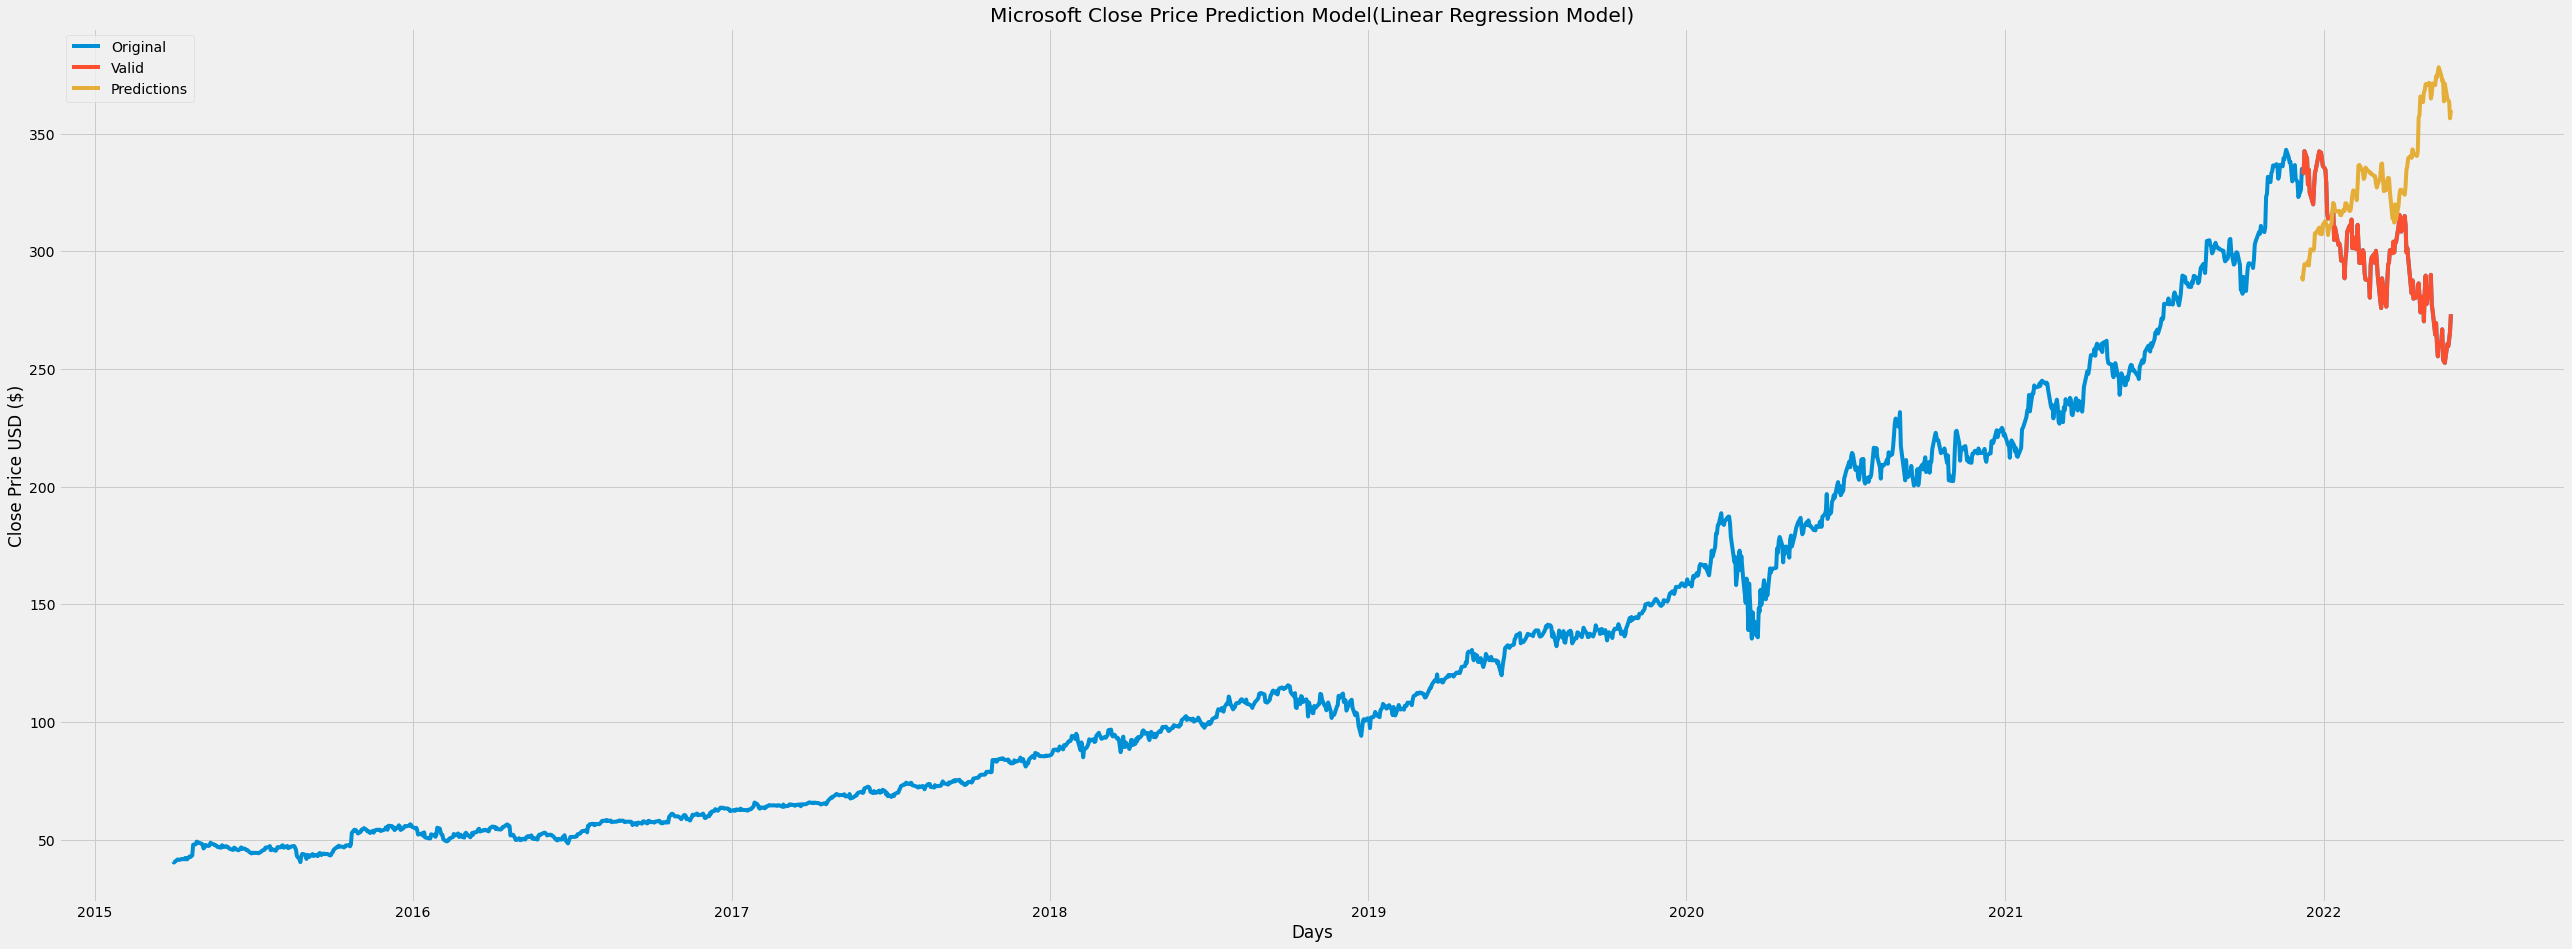

In [71]:
predictions = linearPrediction
valid = msft[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40, 15))
plt.title("Microsoft Close Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(msft["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

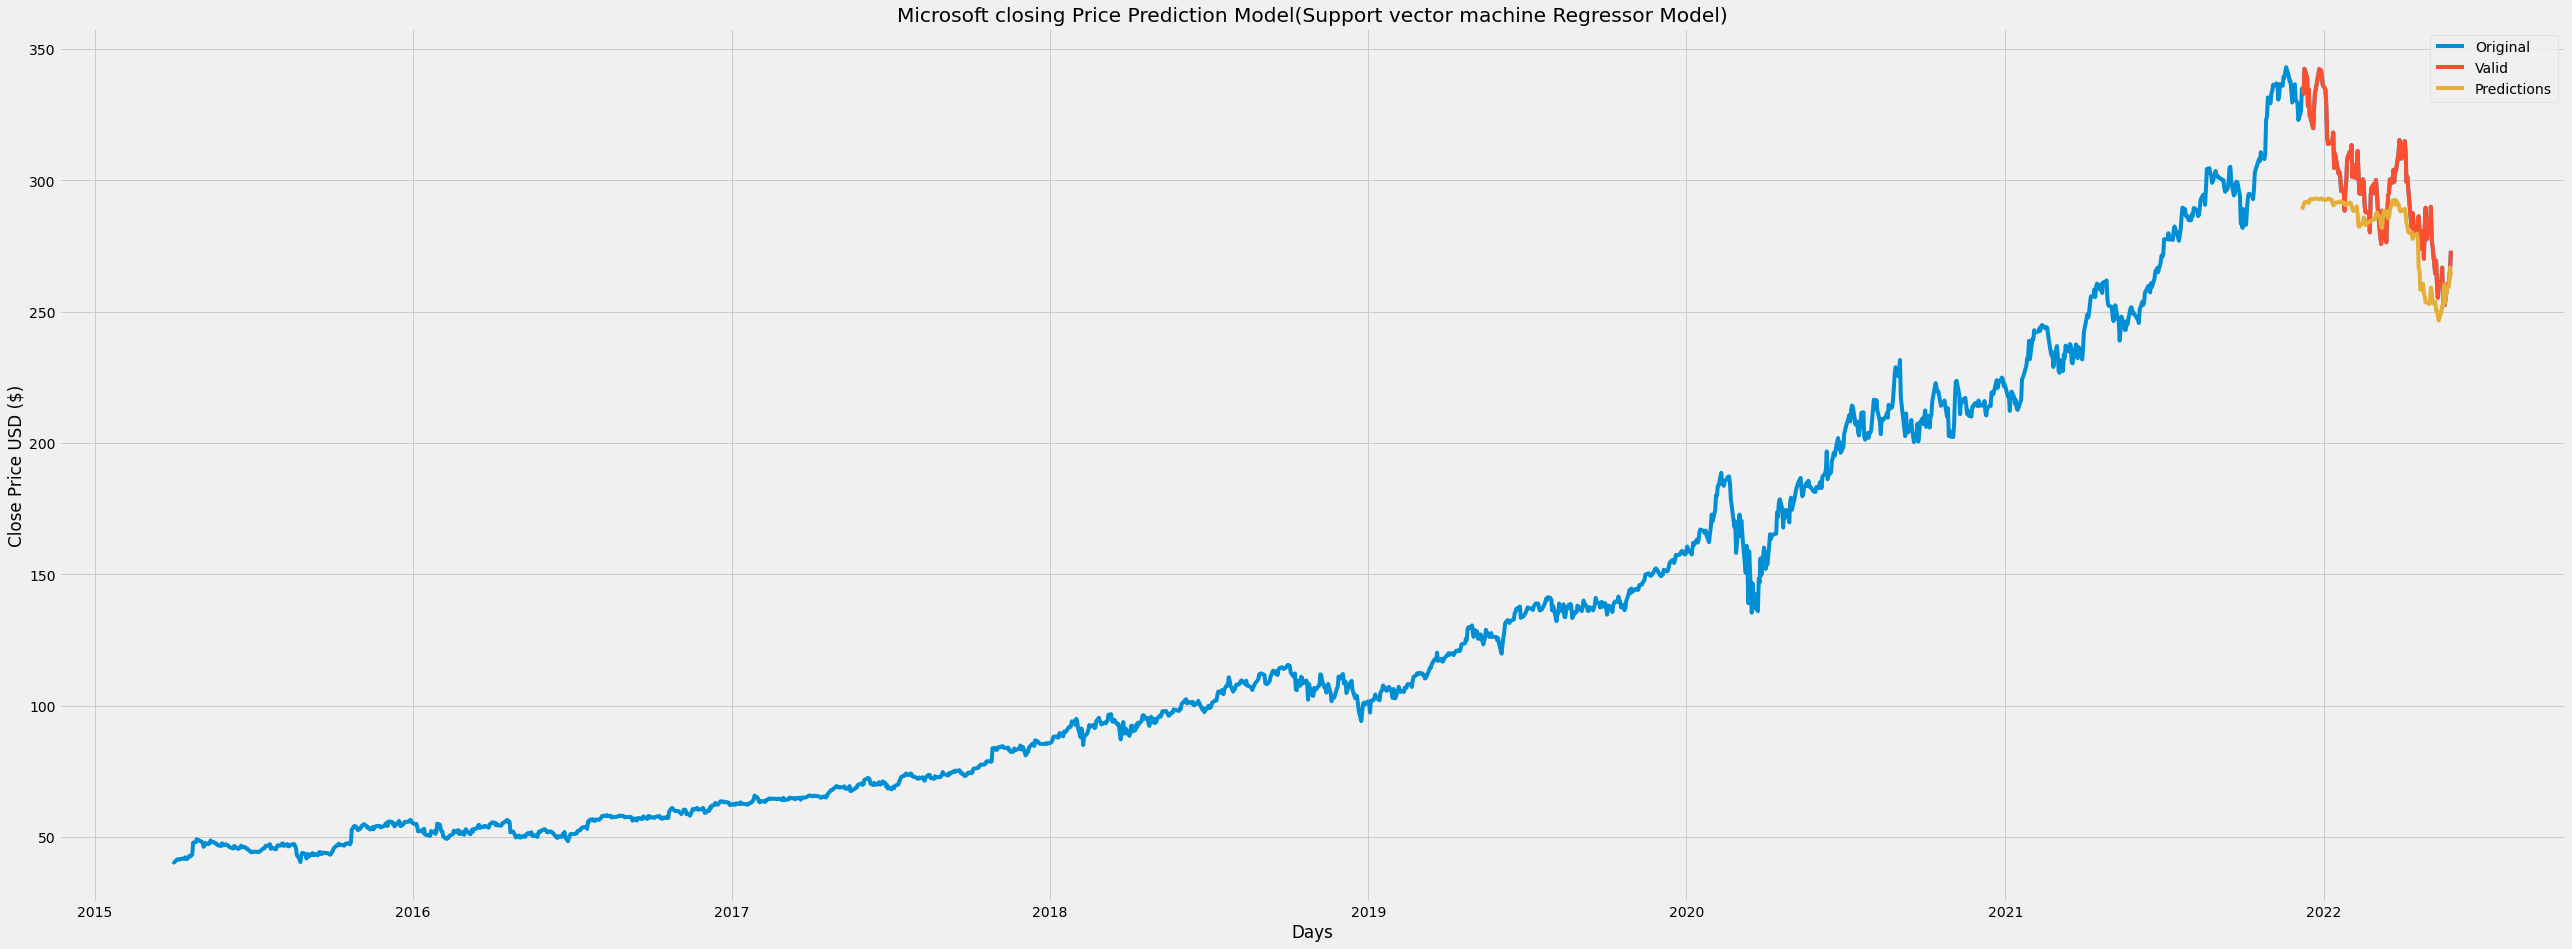

In [72]:
predictions =svmPrediction
valid = msft[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40,15))
plt.title("Microsoft closing Price Prediction Model(Support vector machine Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(msft["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error, accuracy_score as asc,r2_score
from math import sqrt

In [74]:
mse = mean_squared_error(xfuture,svmPrediction)
rmse = sqrt(mse)
print('RMSE: ',rmse)
# since the rmse score depend upon the dependent varable and its range will in lieu to the variable 
#as we can see the value is not small but not that large in range 0 to 1 the model has average fit

RMSE:  40.26299153272165


In [75]:
mse = mean_squared_error(xfuture,treePrediction)
rmse = sqrt(mse)
print('RMSE:',rmse)
# since the rmse score depend upon the dependent varable its range will in lieu to the variable 
#as we can see the value is large in range 0 to 1 the model is not a good fit

RMSE: 41.881078094312294


In [76]:
mse = mean_squared_error(xfuture,linearPrediction)
rmse = sqrt(mse)
print('RMSE: ',rmse)
# since the rmse score depend upon the dependent varable its range will in lieu to the variable 
#as we can see the value is small in range 0 to 1 the model has a good fit

RMSE:  31.728440503556094
